# **Optimizing Marketing Strategies with RFM-Based Client Segmentation for Grotech**

Data Analyst:
- Nabila Avicenna 
- Muhammad Hafizh 
- Adam Praharsya Rahmadian 
- Reinaldi Ragasa 

## **Background**

Grotech offers a range of heavy machinery, including excavator, crane, and forklift, that are built to the highest standards of quality and efficiency. Grotech offers real-time monitoring tools and a digital project management system to support technological needs and boost productivity. Technical assistance, operator training, and client-specific architectural design are among the consulting services offered.

## **Problem Statement**

Grotech struggles to **identify the best marketing strategy because of unclear client segmentation**, which leads to marketing campaigns that fail to reach the intended audience.

We will attempt to respond to the following queries as a *data analyst*:

> Through RFM-based segmentation, how can businesses recognise and comprehend client behaviour patterns, divide up their clientele according to their value (monetary), frequency of purchases (frequency), and last purchase time (recentness) in order to maximise marketing and retention tactics and boost profitability?

## **Data**
We will examine the customer information that the business has gathered in order to respond to the aforementioned query. You can view the dataset [here](https://www.kaggle.com/datasets/zahrazolghadr/rfm-dataset). 

In [1]:
# import library dan modul yang diperlukan
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

import warnings
warnings.filterwarnings('ignore')

This dataset contains transaction data designed to analyze purchasing patterns and support strategic business decision-making.

**Dataset Information**

The dataset includes the following details:

- `ID`: A unique identification number for each customer.
- `Date`: The transaction date in the YYYYMMDD format.
- `Monetary`: The transaction value in a specific currency unit.
- `Gender`: The customer's gender (e.g., male or female).



In [2]:
df = pd.read_csv('aggregate.csv', parse_dates=['Date'], dtype={'ID': object})
df

,ID,Date,Monetary,Gender
0,245114,2014-08-22,469000,F
1,245135,2014-08-12,10000,F
2,245135,2014-08-04,50000,F
3,245135,2014-08-25,10000,F
4,245135,2014-08-22,10000,F
...,...,...,...,...
9995,382961,2014-08-22,10000,M
9996,382961,2014-08-25,50000,M
9997,382961,2014-08-26,20000,M
9998,382961,2014-08-26,10000,M


## **Data Understanding and Cleaning**
Before proceeding with the analysis, we need to gain a deeper understanding of our dataset in the data understanding phase. This process helps identify anomalies within the dataset that need to be addressed during the data cleaning phase. Each anomaly handling step will be accompanied by a justification based on both domain knowledge and statistical analysis.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (10000, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        10000 non-null  object        
 1   Date      10000 non-null  datetime64[ns]
 2   Monetary  10000 non-null  int64         
 3   Gender    10000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 312.6+ KB


In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)
display(df.describe(), df.describe(include='object'))

,Date,Monetary
count,10000,10000.00
mean,2014-07-31 05:56:23.999999744,80097.60
min,2014-06-28 00:00:00,2000.00
25%,2014-07-11 00:00:00,10000.00
50%,2014-08-01 00:00:00,20000.00
75%,2014-08-19 00:00:00,20000.00
max,2014-08-27 00:00:00,14700000.00
std,NaN,459154.52


,ID,Gender
count,10000,10000
unique,2089,2
top,366147,M
freq,66,9814


In [24]:
# Check duplicate values
total_duplicates = df.duplicated().sum()

# Conditional
if total_duplicates > 0:
    print("\nTotal values that are duplicates in the DataFrame:", total_duplicates)
else:
    print("\nThere is no duplicate data in the DataFrame.")


There is no duplicate data in the DataFrame.


In [ ]:
missing_values = df.isnull().sum()
missing_percentage = round((missing_values / len(df)) * 100, 2)

missing_info = pd.DataFrame({
    'Number of Missing Value': missing_values,
    'Percentage of Missing Value': missing_percentage
}).sort_values(by='Percentage of Missing Value', ascending=False)

missing_info_filtered = missing_info[missing_info['Number of Missing Value'] > 0]

print("Missing Values Information:")
print(missing_info_filtered)

print(missing_values.sum())

Informasi Missing Values:
Empty DataFrame
Columns: [Number of Missing Value, Percentage of Missing Value]
Index: []
0


From an initial assessment, we observe the following:
- The dataset consists of 4 columns and 10,000 rows.
- There are no null values in any column.
- The dataset contains 1,880 duplicate entries.
- The Monetary column has the potential for redundancy.


**Handling Duplicate Data**

We identified duplicates in the dataset using a detection method based on all available columns/features. Duplicate data refers to rows with identical values across all columns. These duplicates should be removed, as we aim to retain only unique purchase records.

In [25]:
df = df.drop_duplicates()
print("Number of Rows After Removing Duplicates:", df.shape[0])

Number of Rows After Removing Duplicates: 8120


**Preventing Redundant Columns**

To avoid redundancy, we will rename the `Monetary` column to `Invoice Amount`, making it more intuitive and easier to understand.

In [8]:
df = df.rename(columns={'Monetary': 'Invoice Amount'})
df

,ID,Date,Invoice Amount,Gender
0,245114,2014-08-22,469000,F
1,245135,2014-08-12,10000,F
2,245135,2014-08-04,50000,F
3,245135,2014-08-25,10000,F
4,245135,2014-08-22,10000,F
...,...,...,...,...
9993,382961,2014-08-26,10000,M
9994,382961,2014-08-27,50000,M
9995,382961,2014-08-22,10000,M
9996,382961,2014-08-25,50000,M


Having completed the data cleaning process, let's take a quick look at the summary of our cleaned dataset.

In [9]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(8120, 4)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,object,0,2089,"[375936, 297710]"
1,Date,datetime64[ns],0,24,"[2014-07-26T00:00:00.000000000, 2014-08-12T00:..."
2,Invoice Amount,int64,0,549,"[635000, 675000]"
3,Gender,object,0,2,"[M, F]"


Before cleaning, the dataset contained 10,000 rows. After removing 1,880 duplicate rows, the dataset now consists of 8,120 rows.

## **Exploratory Data Analysis (EDA)**

EDA is conducted to uncover initial insights about the data before performing RFM analysis. This step helps us understand the data distribution, detect patterns, and identify any potential anomalies.

In [10]:
def y_fmt(x, pos): 
    if x >= 1e6: 
        return f'{x*1e-6:.1f}M' 
    elif x >= 1e3: 
        return f'{x*1e-3:.1f}K' 
    else: return f'{x:.0f}'


Invoice Amount Descriptive Statistics:


count        8120.000000
mean        94419.458128
std        508350.493828
min          2000.000000
25%         10000.000000
50%         20000.000000
75%         20000.000000
max      14700000.000000
Name: Invoice Amount, dtype: object


Gender Distribution:
Gender
M   98.14
F    1.86
Name: proportion, dtype: float64 %


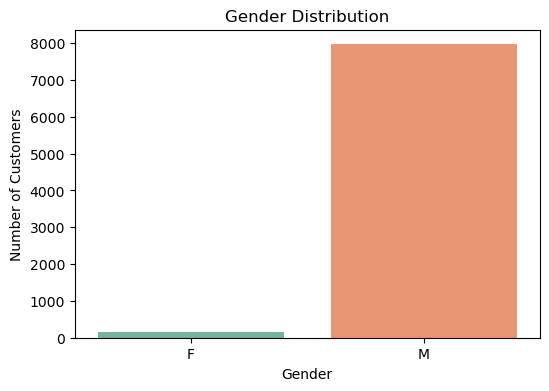

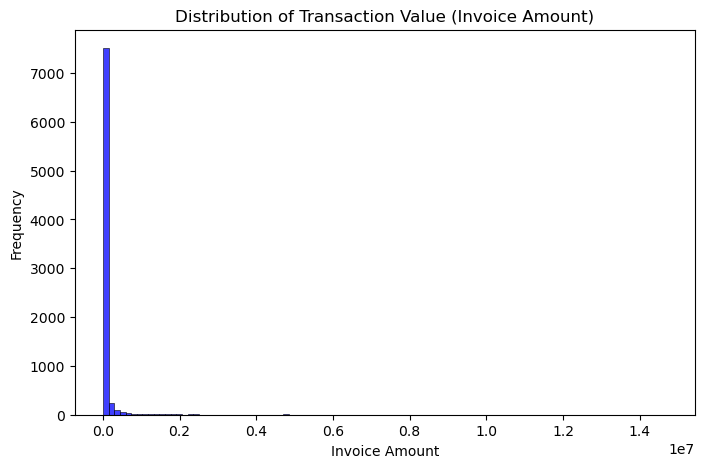

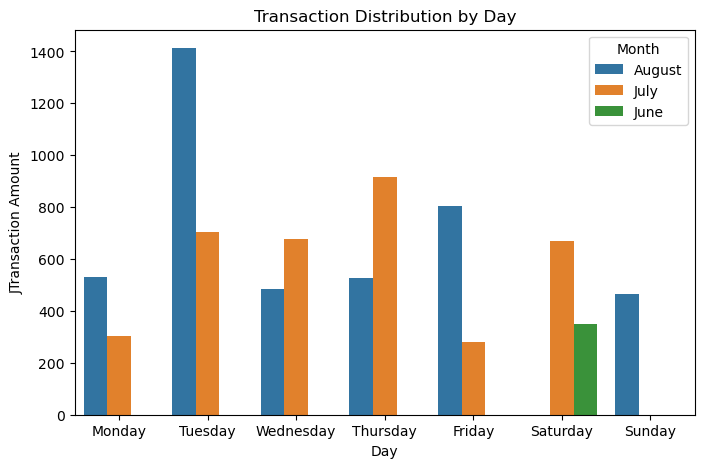

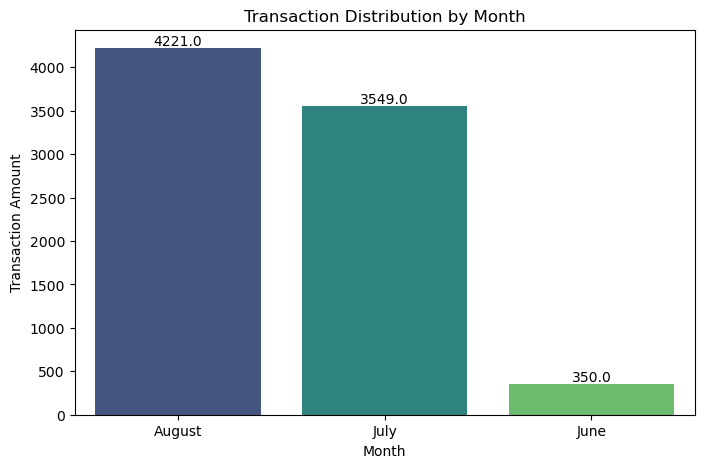


Average Transaction Value per Gender:
Gender
F   56556.29
M   95136.91
Name: Invoice Amount, dtype: float64


In [26]:
import matplotlib.ticker as ticker

print("\nInvoice Amount Descriptive Statistics:")
display(df['Invoice Amount'].describe().apply(lambda x: format(x, 'f')))

print("\nGender Distribution:")
gender_dist = str(df['Gender'].value_counts(normalize=True) * 100) +" %"
print(gender_dist)

plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['Invoice Amount'], bins=100, color='blue')
plt.title('Distribution of Transaction Value (Invoice Amount)')
plt.xlabel('Invoice Amount')
plt.ylabel('Frequency')
plt.show()

df['Date'] = pd.to_datetime(df['Date'])

df['DayOfWeek'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
    
plt.figure(figsize=(8, 5))
sns.countplot(x='DayOfWeek', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='Month')
plt.title('Transaction Distribution by Day')
plt.xlabel('Day')
plt.ylabel('JTransaction Amount')
plt.show()

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Month', data=df, palette='viridis')
plt.title('Transaction Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Transaction Amount')

for p in ax.patches:
    height = p.get_height()
    
    ax.text(
        p.get_x() + p.get_width() / 2,  # X position (middle of the bar)
        height + 0.1,                   # Y position (slightly above the bar)
        f'{height}',                    # The number of transactions
        ha='center',                    # Horizontal alignment
        va='bottom',                    # Vertical alignment
        fontsize=10,                    # Font size for annotation
        color='black'                   # Color of the annotation text
    )
plt.show()

avg_monetary = df.groupby('Gender')['Invoice Amount'].mean()
print("\nAverage Transaction Value per Gender:")
print(avg_monetary)

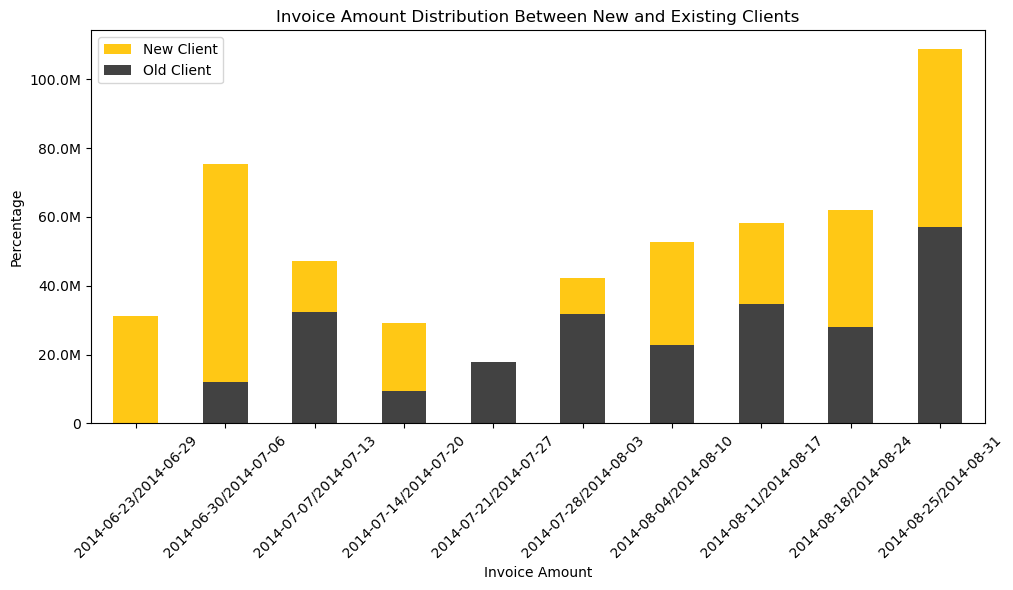

In [27]:
import matplotlib.ticker as ticker
copy_df = df.copy()
copy_df['Week'] = pd.to_datetime(copy_df['Date']).dt.to_period('W').astype(str)
copy_df['First_Purchase_Week'] = copy_df.groupby('ID')['Week'].transform('min')

copy_df['Is_New'] = copy_df['Week'] == copy_df['First_Purchase_Week']

monetary_per_week = copy_df.groupby(['Week', 'Is_New'])['Invoice Amount'].sum().unstack(fill_value=0)

monetary_per_week['Total'] = monetary_per_week.sum(axis=1)
client_per_week_percentage = monetary_per_week.div(monetary_per_week['Total'], axis=0) * 100

plt.figure(figsize=(10, 6))
monetary_per_week[True].plot(kind='bar', stacked=True, color='#ffc815', label='Klien Baru', ax=plt.gca())
monetary_per_week[False].plot(kind='bar', stacked=True, color='#424242', label='Klien Lama', ax=plt.gca())

plt.title('Invoice Amount Distribution Between New and Existing Clients')
plt.xlabel('Invoice Amount')
plt.ylabel('Percentage')
plt.xticks(rotation=45) 
plt.legend(['New Client', 'Old Client'], loc='upper left')
plt.tight_layout()
ax = plt.gca() 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
plt.show()


Is_New,False,True,Total
Week,,,
2014-06-23/2014-06-29,0.00,100.00,100.00
2014-06-30/2014-07-06,38.78,61.22,100.00
2014-07-07/2014-07-13,66.44,33.56,100.00
2014-07-14/2014-07-20,67.75,32.25,100.00
2014-07-21/2014-07-27,75.41,24.59,100.00
2014-07-28/2014-08-03,76.71,23.29,100.00
2014-08-04/2014-08-10,73.40,26.60,100.00
2014-08-11/2014-08-17,72.52,27.48,100.00
2014-08-18/2014-08-24,77.01,22.99,100.00


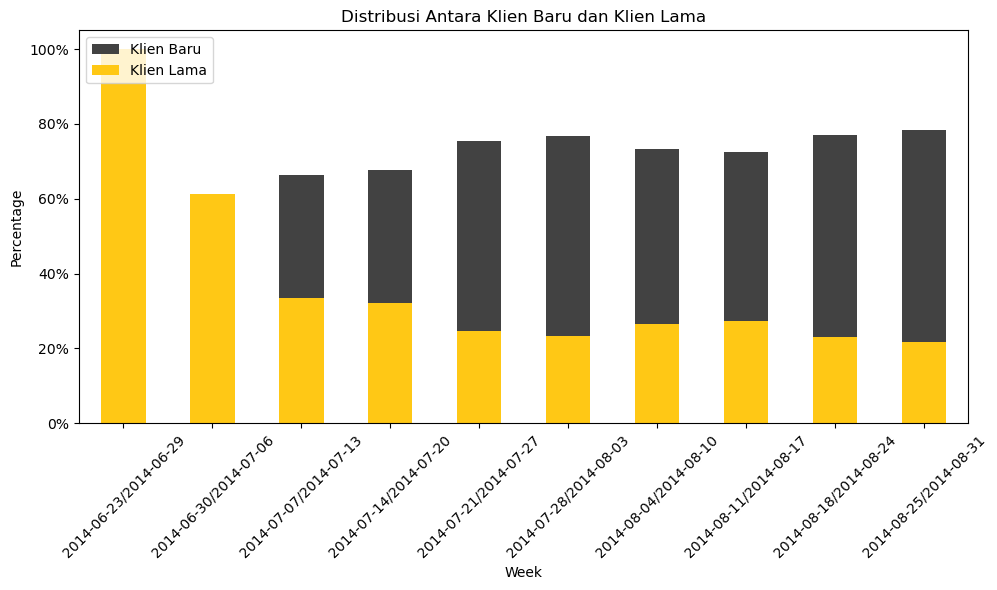

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

copy_df = df.copy()

copy_df['Week'] = pd.to_datetime(copy_df['Date']).dt.to_period('W').astype(str)
copy_df['First_Purchase_Week'] = copy_df.groupby('ID')['Week'].transform('min')

copy_df['Is_New'] = copy_df['Week'] == copy_df['First_Purchase_Week']

client_per_week = copy_df.groupby(['Week', 'Is_New'])['ID'].count().unstack(fill_value=0)

client_per_week['Total'] = client_per_week.sum(axis=1)

client_per_week_percentage = client_per_week.div(client_per_week['Total'], axis=0) * 100

display(client_per_week_percentage)

client_per_week_percentage['Klien_Lama'] = client_per_week_percentage[False]
client_per_week_percentage['Klien_Baru'] = client_per_week_percentage[True]

plt.figure(figsize=(10, 6))

# Plot stacked bars
client_per_week_percentage['Klien_Lama'].plot(kind='bar', stacked=True, color='#424242', label='Klien Lama', ax=plt.gca())
client_per_week_percentage['Klien_Baru'].plot(kind='bar', stacked=True, color='#ffc815', label='Klien Baru', ax=plt.gca())

plt.title('Distribusi Antara Klien Baru dan Klien Lama')
plt.xlabel('Week')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

plt.legend(['New Client', 'Old Client'], loc='upper left')

plt.tight_layout()

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}%'))

plt.show()


**Mencari Outliers**

Terdapat outliers sebanyak: 1861 (22.918719211822662%)


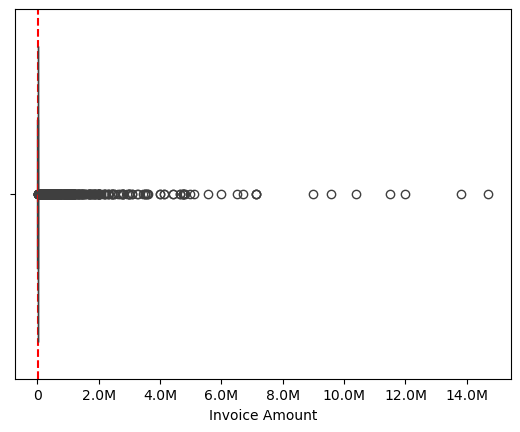

In [ ]:

ax = plt.gca() 
ax.xaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
sns.boxplot(x='Invoice Amount', data=df)

q1 = df['Invoice Amount'].quantile(0.25) 
q3 = df['Invoice Amount'].quantile(0.75)  
iqr = q3 - q1 
lowerwhisker = q1 - (1.5 * iqr) 
upperwhisker = q3 + (1.5 * iqr) 
extreme_lower_bound = q1 - 3 * iqr 
extreme_upper_bound = q3 + 3 * 99
plt.axvline(x=extreme_upper_bound, color='r', linestyle='--', label='Extreme Upper Bound (3 * IQR)')

outliers = df[(df['Invoice Amount'] < lowerwhisker) | (df['Invoice Amount'] > upperwhisker)]
print("There are as many outliers as: " + str(len(outliers)) + " (" + str(len(outliers)  /  len(df)* 100) + "%)")

Insight: 
- The highest number of transactions occurred in **August**, with a total of **4,221 transactions**.
- The **Gender** column is heavily skewed, with **98% of the data belonging to "Male"**. Due to this imbalance, it is not suitable for segmentation in the **RFM analysis**, as it may introduce bias.
- **22% of the values** in the `Invoice Amount` column are outliers, which could significantly impact the RFM scoring.


## **RFM Analysis**

### Column Calculation

In this step, we will add several columns to calculate the **Recency, Frequency, and Monetary (RFM) scores**:

- `Recency`: The number of days since the customer's last transaction, assuming today is the maximum date in the dataset +1.
- `Frequency`: The total number of transactions made by each customer.
- `Monetary`: The total transaction value for each customer.

In [15]:
reference_date = df['Date'].max() + dt.timedelta(days=1)
rfm_df = df.groupby('ID').agg(
    Last_Purchase_Date=('Date', 'max'), 
    Frequency=('ID', 'count'),        
    Monetary=('Invoice Amount', 'sum')  
).reset_index()


rfm_df['Recency'] = (reference_date - rfm_df['Last_Purchase_Date']).dt.days


rfm_df = rfm_df[['ID', 'Recency', 'Frequency', 'Monetary']]

rfm_df.sort_values('Monetary', ascending=False)

,ID,Recency,Frequency,Monetary
293,263337,3,4,27289000
480,274554,30,5,24360000
1644,360228,33,2,18560000
871,297855,6,3,15600000
232,260231,16,4,15280000
...,...,...,...,...
1961,375210,42,1,10000
1704,362606,42,1,10000
936,302270,3,1,7000
1277,324075,6,1,3000


**Identifying Outliers to Handle**
- We will handle outliers only in the `Frequency` and `Monetary` columns to ensure a more realistic representation of transaction frequency and total spending.
- The `Recency` column will remain unchanged, as its outliers still provide valuable insights into customer engagement and do not significantly impact the analysis.


Terdapat outliers sebanyak: 240 (11.488750598372427%)


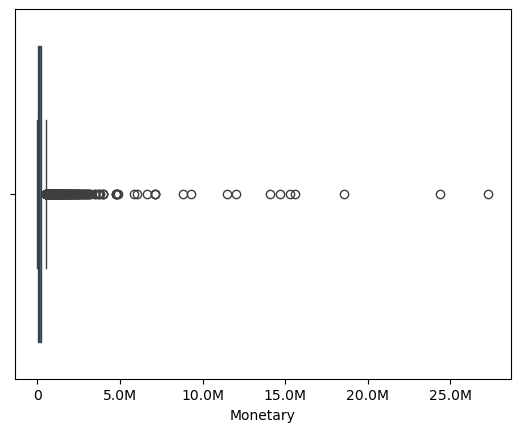

In [16]:
ax = plt.gca() 
ax.xaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
sns.boxplot(x='Monetary', data=rfm_df)

q1 = rfm_df['Monetary'].quantile(0.25) 
q3 = rfm_df['Monetary'].quantile(0.75)  
iqr = q3 - q1 
lowerwhisker = q1 - (1.5 * iqr) 
upperwhisker = q3 + (1.5 * iqr) 
# Filtering out the outliers
outliers = rfm_df[(rfm_df['Monetary'] < lowerwhisker) | (rfm_df['Monetary'] > upperwhisker)]
print("Terdapat outliers sebanyak: " + str(len(outliers)) + " (" + str(len(outliers)  /  len(rfm_df)* 100) + "%)")

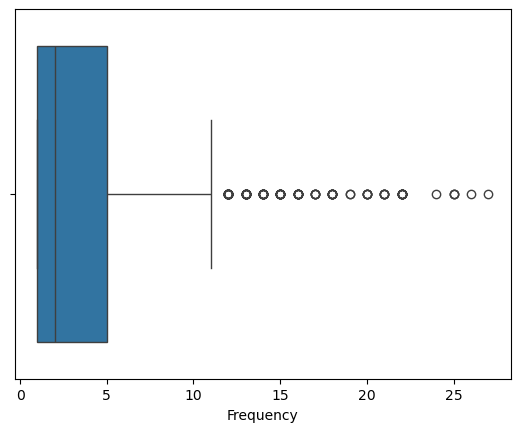

Terdapat outliers sebanyak: 132 (6.318812829104835%)


In [17]:
q1_freq = rfm_df['Frequency'].quantile(0.25) 
q3_freq = rfm_df['Frequency'].quantile(0.75)  
iqr_freq = q3_freq - q1_freq 
lowerwhisker_freq = q1_freq - (1.5 * iqr_freq) 
upperwhisker_freq = q3_freq + (1.5 * iqr_freq) 
sns.boxplot(x='Frequency', data=rfm_df)
plt.show()
outliers_freq = rfm_df[(rfm_df['Frequency'] < lowerwhisker_freq) | (rfm_df['Frequency'] > upperwhisker_freq)]
print("Terdapat outliers sebanyak: " + str(len(outliers_freq)) + " (" + str(len(outliers_freq)  /  len(rfm_df)* 100) + "%)")

## **Determining Frequency, Monetary, Recency Score**
After identifying the outliers to be handled, we will calculate the scores for `Frequency`, `Monetary`, and `Recency`. Outliers will be excluded when assigning scores for `Frequency` and `Monetary` to ensure a fair distribution.

In [18]:
def equal_width_binning(data, n_bins):
    # Menggunakan np.linspace untuk menghitung batas bin secara merata dari nilai minimum ke maksimum
    bin_edges = np.linspace(data.min(), data.max(), n_bins + 1)
    
    # Menggunakan pd.cut untuk membagi data menjadi bin berdasarkan bin_edges yang telah dihitung
    # 'labels=False' berarti hasilnya adalah label numerik untuk setiap bin
    binned_data = pd.cut(data, bins=bin_edges, include_lowest=True, labels=False)
    
    # Mengembalikan hasil binned data
    return binned_data

# Fungsi utama untuk menghitung skor RFM (Recency, Frequency, Monetary)
def rfm_score(rfm_df, n_bins=5, upperwhisker_freq=None, upperwhisker=None):

    # Menghitung bin untuk masing-masing kolom RFM menggunakan equal-width binning
    recency_bins = equal_width_binning(rfm_df['Recency'], n_bins)
    frequency_bins = equal_width_binning(rfm_df['Frequency'], n_bins)
    monetary_bins = equal_width_binning(rfm_df['Monetary'], n_bins)
    
    # Memberikan skor pada setiap pelanggan untuk kolom 'Frequency' dan 'Monetary'
    # Skor ditentukan dengan menambahkan 1 karena label dimulai dari 0
    frequency_score = [f + 1 for f in frequency_bins]
    monetary_score = [m + 1 for m in monetary_bins]

    # Menambahkan kolom skor untuk Frequency dan Monetary pada dataframe
    rfm_df['Frequency_Score'] = frequency_score
    rfm_df['Monetary_Score'] = monetary_score

    # Jika ada outliers pada kolom 'Frequency', set skor menjadi 5
    rfm_df.loc[rfm_df['Frequency'] > upperwhisker_freq, 'Frequency_Score'] = 5
    
    # Jika ada outliers pada kolom 'Monetary', set skor menjadi 5
    rfm_df.loc[rfm_df['Monetary'] > upperwhisker, 'Monetary_Score'] = 5

    # Menentukan skor Recency, dimana semakin kecil nilai Recency (semakin baru transaksi), semakin tinggi skornya
    rfm_df['Recency_Score'] = [n_bins - r for r in recency_bins]

    # Mengumpulkan skor akhir RFM (Recency, Frequency, Monetary) ke dalam dataframe baru
    rfm_scores_df = rfm_df[['ID', 'Recency_Score', 'Frequency_Score', 'Monetary_Score']]
    
    # Mengembalikan dataframe yang berisi skor RFM
    return rfm_scores_df


rfm_scores = rfm_score(rfm_df, 5, upperwhisker_freq, upperwhisker)
rfm_df_calculate = rfm_df.copy()
rfm_df_calculate

,ID,Recency,Frequency,Monetary,Frequency_Score,Monetary_Score,Recency_Score
0,245114,6,1,469000,1,1,5
1,245135,3,4,80000,1,1,5
2,245204,2,5,50000,1,1,5
3,245238,14,2,70000,1,1,4
4,245261,9,1,485000,1,1,5
...,...,...,...,...,...,...,...
2084,382576,14,6,140000,1,1,4
2085,382741,16,2,40000,1,1,4
2086,382785,3,7,110000,2,1,5
2087,382940,2,4,40000,1,1,5


### Calculating RFM Score

We will compute the RFM Score by weighting each component as follows:
 1. `Frequency` - 45%
 2. `Monetary` - 35%
 3. `Recency` - 20%

In [19]:
rfm_df_calculate['Recency_Score'] = pd.to_numeric(rfm_df_calculate['Recency_Score'], errors='coerce')
rfm_df_calculate['Frequency_Score'] = pd.to_numeric(rfm_df_calculate['Frequency_Score'], errors='coerce')
rfm_df_calculate['Monetary_Score'] = pd.to_numeric(rfm_df_calculate['Monetary_Score'], errors='coerce')

weight_recency = 0.2
weight_frequency = 0.45
weight_monetary = 0.35

rfm_df_calculate['RFM_Score'] = (
    rfm_df_calculate['Recency_Score'] * weight_recency +
    rfm_df_calculate['Frequency_Score'] * weight_frequency +
    rfm_df_calculate['Monetary_Score'] * weight_monetary
)

rfm_df_calculate

,ID,Recency,Frequency,Monetary,Frequency_Score,Monetary_Score,Recency_Score,RFM_Score
0,245114,6,1,469000,1,1,5,1.80
1,245135,3,4,80000,1,1,5,1.80
2,245204,2,5,50000,1,1,5,1.80
3,245238,14,2,70000,1,1,4,1.60
4,245261,9,1,485000,1,1,5,1.80
...,...,...,...,...,...,...,...,...
2084,382576,14,6,140000,1,1,4,1.60
2085,382741,16,2,40000,1,1,4,1.60
2086,382785,3,7,110000,2,1,5,2.25
2087,382940,2,4,40000,1,1,5,1.80


## Membuat Segmentasi

Karena kita menentukan bobot yang paling besar ada di `Frequency`, kemudian `Monetary` dan terakhir `Recency`. Maka kita akan membuat segmentasi secara ordinal sebagai berikut:
* `Champion`:
    - Recency: High – Recently made a purchase.
    - Frequency: High – Consistently makes purchases.
    - Monetary: High – Spends a significant amount or purchases frequently.
    - Characteristics:
        -   Highly loyal and active customers who frequently buy with large expenditures. They are devoted customers who always return and are highly engaged with the brand.   

* `Loyal Customer`
    - **Recency**: High – Recently made a purchase, though not as frequently as Champions.
    - **Frequency**: Medium to High – Regularly makes purchases, but not as intensively as Champions.
    - **Monetary**: Medium – Spends a considerable amount but not consistently.
    - **Characteristics**:
    Customers who are loyal to the brand and its products, even if they do not purchase as frequently as Champions. They demonstrate a consistent level of loyalty.
* `Cannot Lose Them`
    - **Recency**: Medium – Still recent, but not as active as Champions or Loyal Customers
    - **Frequency**: High – Frequently makes purchases, though there may be a slight decline.
    - **Monetary**: High – Their purchases are significant and highly valuable to the business.
    - **Characteristics**:
    These customers are crucial to retain due to their high revenue contribution. They may be showing signs of declining engagement, but they remain loyal.

* `Potential Loyalist`
    - **Recency**: Medium – Recently made a purchase.
    - **Frequency**: Medium – Purchases are less frequent, but there is potential for more.
    - **Monetary**: Medium – Their spending is considerable but inconsistent.
    - **Characteristics**:
    These customers are beginning to show signs of loyalty. They may have purchased from your brand a few times but have not yet reached a high frequency or stable spending level. With the right attention, they have the potential to become loyal customers.

* `Need Attention`
    - **Recency**: Medium to Low – Haven’t purchased in a while, but recently showed some activity.
    - **Frequency**: Low – A noticeable decline in purchase frequency.
    - **Monetary**: Medium to Low – Spending is decreasing, but there is still potential.
    - **Characteristics**:
    Previously loyal customers who are beginning to show a decline in purchase frequency and spending. They need attention to re-engage with the brand, possibly through promotions or special services.

* `Promising`
    - **Recency**: Medium to High – Recently made their first purchase or have bought a few times.
    - **Frequency**: Medium – Purchases are still limited, but there are signs of growing interest.
    - **Monetary**: Medium – Their spending is decent but not yet consistent.
    - **Karakteristik**:
        Customers who are just beginning their journey with the brand and showing positive signs of increased engagement. They have the potential to become loyal customers if given the right incentives.

* `At Risk`
    - **Recency**: Low – It has been quite a while since their last purchase.
    - **Frequency**: Low – A significant decline in purchase frequency.
    - **Monetary**: Medium to Low – Their spending has decreased, though still higher than the "About to Sleep" segment.
    - **Karakteristik**:
        Customers at high risk of stopping their purchases or switching to competitors. They have shown a clear decline in both purchase frequency and recency. Immediate action is needed to re-engage them through special offers or personalized communication.

* `About to Sleep`
    - **Recency**: Very Low – It has been a long time since their last purchase.
    - **Frequency**: Very Low – Almost no purchases within a certain period.waktu tertentu.
    - **Monetary**: Low – Their spending is very low or even zero for an extended period.

    - **Karakteristik**:
        Customers who are barely engaged with the brand anymore. They may have stopped purchasing for a long time or shown no further interest. They are on the verge of completely churning unless significant efforts are made to rekindle their interest.

In [20]:
def classify_rfm_score(score):
    if score > 4.5:
        return 'Champion'
    elif score > 4:
        return 'Loyal Customer'
    elif score > 3.5:
        return 'Cannot Lose Them'
    elif score > 3:
        return 'Potential Loyalist'
    elif score > 2.5:
        return 'Need Attention'
    elif score > 2:
        return 'Promising'
    elif score > 1.5:
        return 'New Customers'
    elif score > 1:
        return 'At Risk'
    else:
        return 'About to Sleep'
    
rfm_df_calculate['Segment'] = rfm_df_calculate['RFM_Score'].apply(classify_rfm_score)
rfm_df_calculate.to_excel('segmen_final.xlsx')

display(rfm_df_calculate)

,ID,Recency,Frequency,Monetary,Frequency_Score,Monetary_Score,Recency_Score,RFM_Score,Segment
0,245114,6,1,469000,1,1,5,1.80,New Customers
1,245135,3,4,80000,1,1,5,1.80,New Customers
2,245204,2,5,50000,1,1,5,1.80,New Customers
3,245238,14,2,70000,1,1,4,1.60,New Customers
4,245261,9,1,485000,1,1,5,1.80,New Customers
...,...,...,...,...,...,...,...,...,...
2084,382576,14,6,140000,1,1,4,1.60,New Customers
2085,382741,16,2,40000,1,1,4,1.60,New Customers
2086,382785,3,7,110000,2,1,5,2.25,Promising
2087,382940,2,4,40000,1,1,5,1.80,New Customers


## **Segementation Visualization**

After completing the segmentation, we will move on to the next step: visualizing the segments using a treemap and a bubble plot to make the analysis easier and more intuitive.

In [21]:
pd.DataFrame(rfm_df_calculate['Segment'].value_counts())

,count
Segment,
New Customers,1084
Promising,268
At Risk,240
About to Sleep,160
Cannot Lose Them,120
Potential Loyalist,112
Need Attention,93
Champion,12


,Segment,count,Percentage
0,New Customers,1084,51.89
1,Promising,268,12.83
2,At Risk,240,11.49
3,About to Sleep,160,7.66
4,Cannot Lose Them,120,5.74
5,Potential Loyalist,112,5.36
6,Need Attention,93,4.45
7,Champion,12,0.57


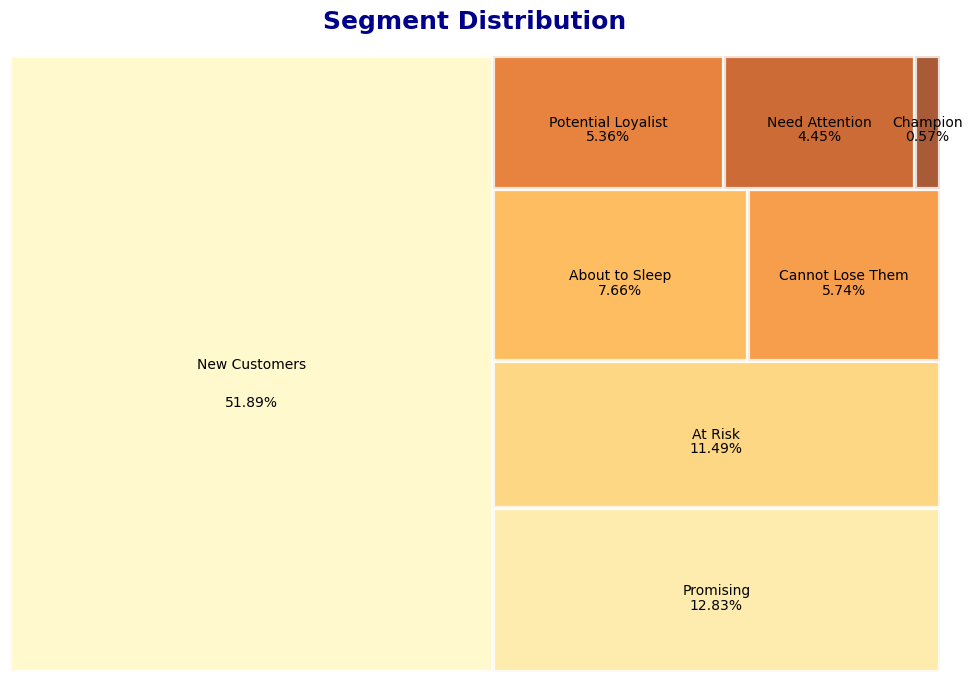

In [22]:
segment_counts = rfm_df_calculate['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'count']

colors = sns.color_palette('YlOrBr', len(segment_counts))
total_count = segment_counts['count'].sum()
segment_counts['Percentage'] = (segment_counts['count'] / total_count) * 100

plt.figure(figsize=(12, 8))
ax = squarify.plot(
    sizes=segment_counts['count'],
    label=segment_counts['Segment'],
    color=colors,
    alpha=0.8,
    edgecolor='white',
    linewidth=3
)

display(segment_counts)

for patch in ax.patches:
    # Ambil nilai persentase dari data, bukan dari label
    percentage = segment_counts.loc[segment_counts['Segment'] == patch.get_label(), 'Percentage'].values[0]

    # Hitung posisi tengah kotak
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height() / 2  # Posisi tengah vertikal kotak


        # Jika bukan kata khusus, pertahankan posisi semula
    xytext = (x, y - 0.05 * patch.get_height())

    # Tambahkan anotasi tanpa panah
    plt.annotate(f"{percentage:.2f}%", xy=(x, y), xytext=xytext,
                 ha='center', va='top', fontsize=10)

plt.axis('off')

plt.title(
    'Segment Distribution',
    fontsize=18,
    fontweight='bold',
    color='darkblue',
    pad=20
)

# Display the plot
plt.show()

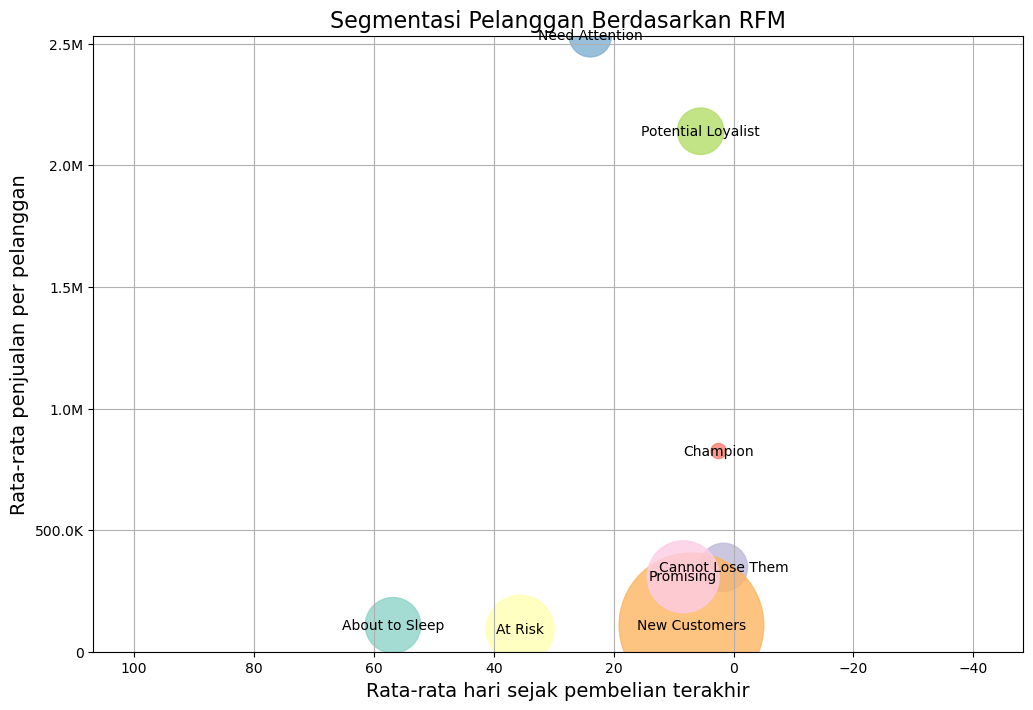

In [23]:
rdf = rfm_df_calculate.copy()

segment_summary = rdf.groupby('Segment').agg(
    avg_days_since_purchase=('Recency', 'mean'),
    avg_sales_per_customer=('Monetary', 'mean'),
    customer_count=('ID', 'count')
).reset_index()

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    segment_summary['avg_days_since_purchase'],
    segment_summary['avg_sales_per_customer'],
    s=segment_summary['customer_count'] * 10,
    c=sns.color_palette('Set3', len(segment_summary)),
    alpha=0.8
)

# Labeling the axes and title
plt.xlabel('Rata-rata hari sejak pembelian terakhir', fontsize=14)
plt.ylabel('Rata-rata penjualan per pelanggan', fontsize=14)
plt.title('Segmentasi Pelanggan Berdasarkan RFM', fontsize=16)
plt.grid(True)

for i, text in enumerate(segment_summary['Segment']):
    plt.annotate(
        text,
        (segment_summary['avg_days_since_purchase'][i], segment_summary['avg_sales_per_customer'][i]),
        ha='center',
        va='center'
    )

plt.gca().invert_xaxis()

plt.xlim(segment_summary['avg_days_since_purchase'].max() + 50, segment_summary['avg_days_since_purchase'].min() - 50)
plt.ylim(0, segment_summary['avg_sales_per_customer'].max() + 100)
ax = plt.gca() 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
plt.show()


## **Recommendation**

### **Segmentation Based on Priority**

Based on the analysis, customers are categorized into four groups according to priority scale.

#### **Largest Group** (`New Customer`) – 51.89%

- **Justification:**  
  The *New Customer* group is the primary focus as it represents the largest segment, comprising **1,084 customers**. Historical data indicates a high percentage of repeat customers, highlighting a strong potential to retain this group with the right strategies.

- **Key Areas for Improvement:**
  - Purchase Frequency
  - Total Invoice Value

- **Strategy:**
  - Implement targeted treatments to convert *New Customers* into loyal customers.

#### **Critical Group** (`Promising`, `At Risk`, and `About to Sleep`) – 32.17%

- **Justification:**  
  Effectively managing the *Critical Group* (Promising and At Risk) not only prevents customer churn but also enhances overall loyalty, creating long-term growth opportunities for the business.

- **Key Areas for Improvement:**
  - Purchase Frequency
  - Recency

- **Strategy:**
  - Implement reactivation programs, product reminders, or special offers to improve frequency and recency.

#### **High-Value Group** (`Need Attention` and `Potential Loyalist`) – 14.41%

- **Justification:**  
  Customers in the *High-Value Group* have strong potential to become highly loyal customers if given the right attention. *Need Attention* customers have made several purchases but require further engagement to increase their loyalty, while *Potential Loyalists* show signs of becoming loyal but still need encouragement to move in that direction.

- **Key Areas for Improvement:**
  - Purchase Frequency
  - Total Invoice

- **Strategy:**
  - Focus on building engagement through communication to increase **purchase frequency** and offer incentives to boost **total invoice**.
  - Implement loyalty programs or further product introductions.

#### **Royal Group** (`Champion`, `Cannot Lose Them`, and `Loyalist`) – 1.54%

- **Justification:**  
  The *Royal Group* consists of highly loyal customers who make significant contributions to the business. They have demonstrated long-term commitment through repeat purchases, referrals, and testimonials, making them invaluable to sustaining revenue and brand reputation.

- **Key Areas for Improvement:**
  - Purchase Frequency
  - Total Invoice

- **Strategy:**
  - Provide premium services and exclusive rewards to maintain engagement and encourage higher spending through special offers or additional products.
  - Maintain regular communication to strengthen relationships and ensure continued involvement.


## **Conclusion**

This segmentation strategy offers valuable insights into managing and optimizing customer relationships based on their behavioral patterns and potential. By strategically prioritizing these segments and implementing tailored engagement approaches, businesses can enhance customer experience, foster long-term loyalty, and drive sustainable growth.  

Each customer segment possesses unique characteristics and opportunities. With a data-driven and targeted approach, these insights can be leveraged to maximize customer lifetime value and achieve long-term competitive advantages.
